In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Load Dataset
df = pd.read_csv("step_data.csv")  # Replace with actual path

# Step 1: Convert 'timestamp' if needed or drop (for now we'll drop)
df.drop(columns=['timestamp'], inplace=True)

# Step 2: Check for missing values
df = df.dropna()

# Step 3: Separate Features and Target
X = df[[
    "steps",
    "activity_duration",
    "step_frequency",
    "rest_period",
    "noise_flag",
    "battery_level",
    "temperature",
    "device_id",
    "pet_id"
]]
# Features
y = df['anomaly_detected']  # Target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))  # reshape to (samples, timesteps, features)


# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Preprocessing Complete ✅")


Preprocessing Complete ✅


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8943 - loss: 0.6134 - val_accuracy: 0.9350 - val_loss: 0.2482
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.3927 - val_accuracy: 0.9350 - val_loss: 0.2526
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9082 - loss: 0.3129 - val_accuracy: 0.9350 - val_loss: 0.2608
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9047 - loss: 0.3330 - val_accuracy: 0.9350 - val_loss: 0.2439
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9057 - loss: 0.3196 - val_accuracy: 0.9350 - val_loss: 0.2458
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9089 - loss: 0.3140 - val_accuracy: 0.9350 - val_loss: 0.2539
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9093 - loss: 0.3072 - val_accuracy: 0.9350 - val_loss: 0.2491
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8899 - loss: 0.3490 - val_accuracy: 0.

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9287 - loss: 0.2650  
Test Accuracy: 0.9350


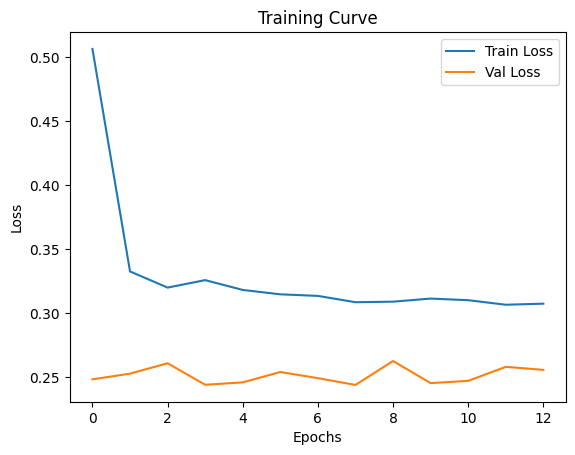

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Curve')
plt.show()


In [15]:
# Save trained model
model.save("anomaly_lstm_model.h5")
print("✅ Model saved as 'anomaly_lstm_model.h5'")


✅ Model saved as 'anomaly_lstm_model.h5'


In [16]:
# Save scaler
import joblib
joblib.dump(scaler, "feature_scaler.pkl")

['feature_scaler.pkl']

In [24]:
sample_data=pd.DataFrame(df.tail()) 
df.to_csv('out.csv', index=False)  


In [ ]:
#out.csv is the test file that we will use to make the prediction 

,device_id,pet_id,steps,activity_duration,step_frequency,rest_period,noise_flag,battery_level,temperature,anomaly_detected
995,1039,5087,311,395,0.79,292,0,36,23.3,0
996,1062,5042,388,431,0.90,201,1,96,23.3,0
997,1097,5083,127,202,0.63,289,1,39,23.3,0
998,1009,5027,140,588,0.24,17,1,57,23.3,0
999,1086,5078,61,439,0.14,181,0,14,23.3,0
